In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# **Imports**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
dftrain = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
dftest = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

# **Checkout Data Structures**

In [4]:
dftrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#shape of train dataset
dftrain.shape

(1460, 81)

In [6]:
dftrain.describe().transpose()
#average SalePrice is $180,921

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [7]:
dftrain.info()
#mixture of int, obj and some float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
#shape of test dataset
dftest.shape

(1459, 80)

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

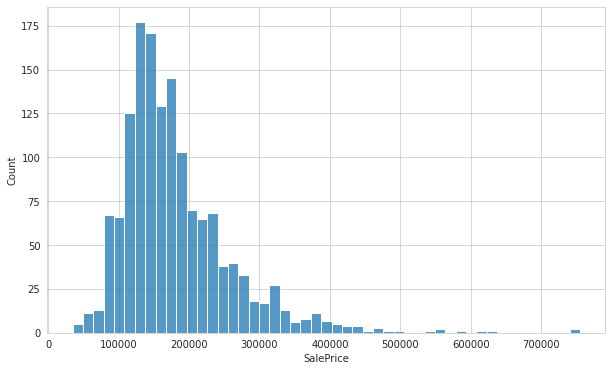

In [9]:
#see distribution of SalesPrice
plt.figure(figsize=(10,6))
sns.histplot(dftrain['SalePrice'])
#most houses are around $100,000 to $200,000
#seem like outlier starts at >450,000

In [10]:
dftrain.corr()['SalePrice'].sort_values(ascending=False)
#corr >=0.5 ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
#corr (-) ['KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold', 'LowQualFinSF', 'MiscVal', 'BsmtHalfBath', BsmtFinSF2]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

# **Exploratory Data Analysis**

Overall Quality of Materials and finishes

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

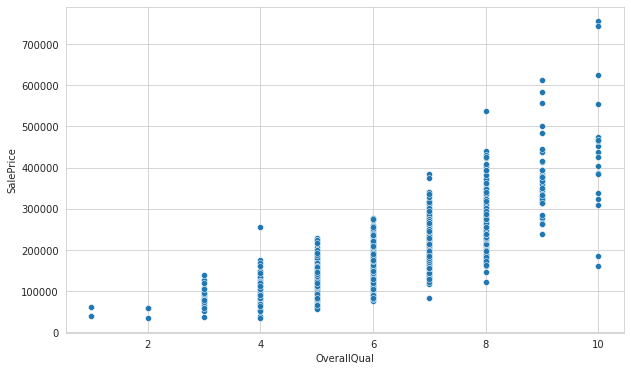

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='OverallQual', y='SalePrice', data=dftrain)
#house with higher overall material and finish quality has higher sales price

Gound Living Area (sqrft)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

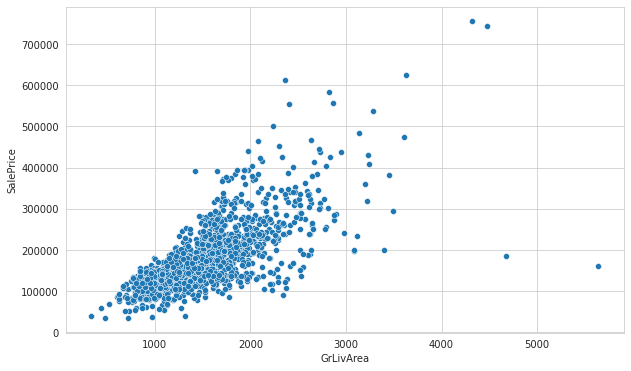

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=dftrain)
#strong linear regression shown in the graph
#should cut out houses that has above ground living area over 4,500 sqrft because its outlier will make the model less accurate

In [13]:
dftrain = dftrain.drop(dftrain[dftrain['SalePrice']>600000].index)
dftrain = dftrain.drop(dftrain[dftrain['GrLivArea']>4000].index)

Total Basement Area (sqrft)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

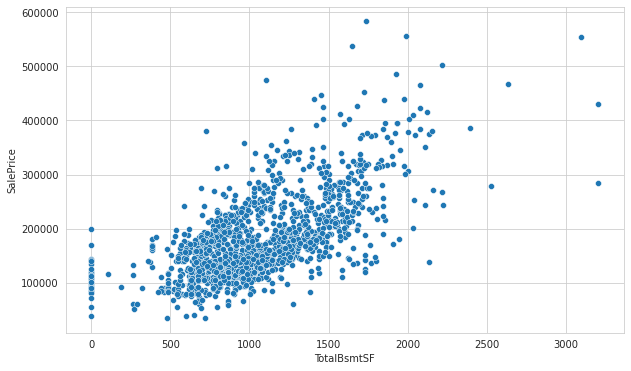

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=dftrain)

In [15]:
#some linear relationship but should cut out the outliers too (>3000)
dftrain = dftrain.drop(dftrain[dftrain['TotalBsmtSF']>3000].index)

Garage Area (sqrft)

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

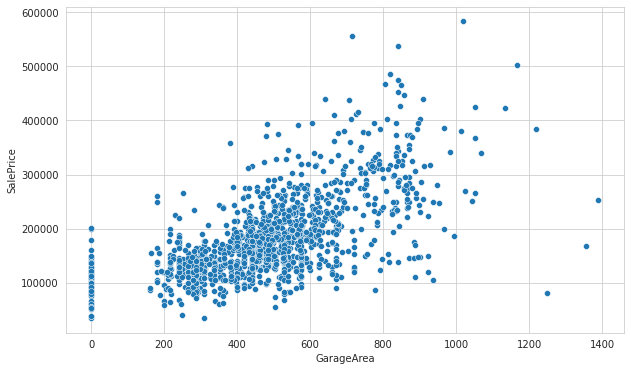

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='GarageArea', y='SalePrice', data=dftrain)

In [17]:
#cut out outliers
dftrain = dftrain.drop(dftrain[dftrain['GarageArea']>1200].index)

Garage Car Capacity

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

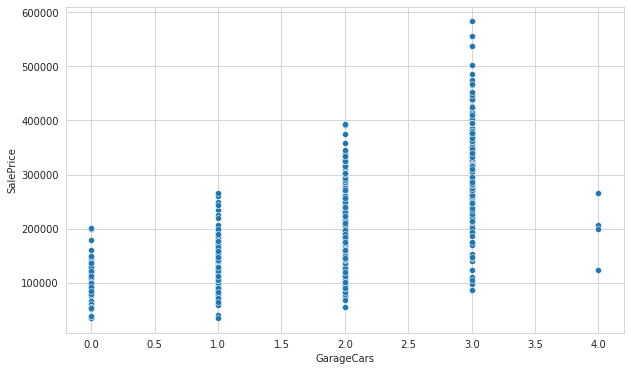

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='GarageCars', y='SalePrice', data=dftrain)

First Floor sqrft

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

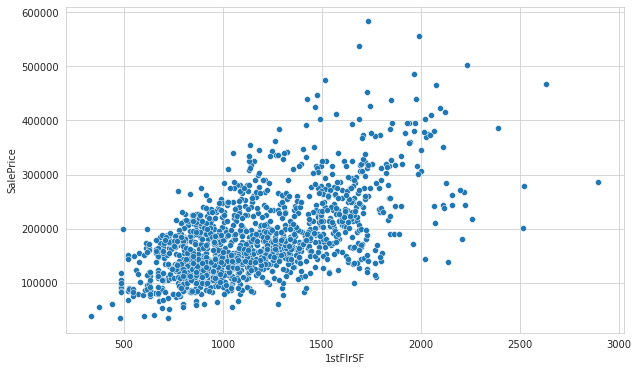

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='1stFlrSF', y='SalePrice', data=dftrain)

# **Feature Engineering**

Seperate Features

In [20]:
dftrain = dftrain.drop(['Id'], axis=1)

xy_train = dftrain

test_id = dftest['Id']

x_test = dftest.drop(['Id'], axis=1)

In [21]:
#created ttdf to do feature engineer on both train and test df at the same time
ttdf = pd.concat([xy_train, x_test], axis=0)

In [22]:
len(ttdf)

2906

In [23]:
#create table to see null values
null_values = pd.DataFrame(ttdf.isnull().sum().sort_values(ascending=False), columns=['Sum_null'])
null_values = null_values[null_values['Sum_null']>0]
null_values['Percent'] = (null_values['Sum_null']/2906)*100
null_values['Features'] = null_values.index

null_values

,Sum_null,Percent,Features
PoolQC,2898,99.724708,PoolQC
MiscFeature,2802,96.421198,MiscFeature
Alley,2708,93.186511,Alley
Fence,2336,80.385409,Fence
SalePrice,1459,50.206469,SalePrice
FireplaceQu,1419,48.830007,FireplaceQu
LotFrontage,484,16.655196,LotFrontage
GarageCond,159,5.471438,GarageCond
GarageFinish,159,5.471438,GarageFinish
GarageQual,159,5.471438,GarageQual


**Work with Missing Values**

<AxesSubplot:>

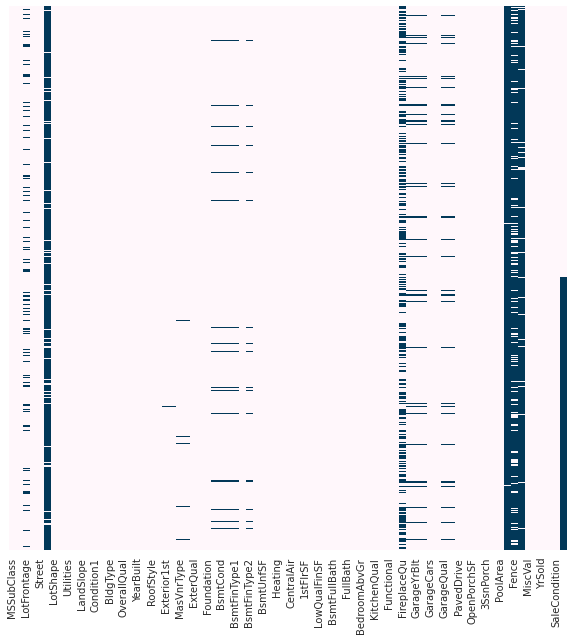

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(ttdf.isnull(), yticklabels=False, cbar=False, cmap='PuBu')

In [25]:
ttdf = ttdf.drop((null_values[(null_values['Sum_null']>100)&(null_values['Sum_null']<1420)]).index, axis=1)

In [26]:
ttdf = ttdf.drop(null_values[null_values['Sum_null']>2000].index, axis=1)

Drop duplicated info columns

In [27]:
ttdf = ttdf.drop(['OverallCond'], axis=1)

In [28]:
ttdf = ttdf.drop(['BsmtCond'], axis=1)

In [29]:
ttdf = ttdf.drop(['LandSlope'], axis=1)

In [30]:
ttdf = ttdf.drop(['1stFlrSF'], axis=1)
ttdf = ttdf.drop(['2ndFlrSF'], axis=1)

In [31]:
ttdf = ttdf.drop(['HouseStyle'], axis=1)

In [32]:
ttdf = ttdf.drop(['RoofMatl'], axis=1)

Drop Year built info

In [33]:
ttdf = ttdf.drop(['YearBuilt'], axis=1)

In [34]:
ttdf = ttdf.drop(['YearRemodAdd'], axis=1)

Fill null with info got from description file

In [35]:
ttdf['MasVnrType'] = ttdf['MasVnrType'].fillna('none')
ttdf['BsmtExposure'] = ttdf['BsmtExposure'].fillna('no_bsmt')
ttdf['BsmtFinType1'] = ttdf['BsmtFinType1'].fillna('no_bsmt')
ttdf['BsmtFinType2'] = ttdf['BsmtFinType2'].fillna('no_bsmt')
ttdf['BsmtQual'] = ttdf['BsmtQual'].fillna('no_bsmt')

Fill null with mean values

In [36]:
ttdf['MasVnrArea'] = ttdf['MasVnrArea'].fillna(value=ttdf['MasVnrArea'].mean())

**Combine features**

In [37]:
ttdf['Bathrooms_total'] = (ttdf['FullBath'] + ttdf['BsmtFullBath'] + (0.5* (ttdf['HalfBath']+ttdf['BsmtHalfBath'])))

ttdf.drop(['FullBath'], axis=1, inplace=True)
ttdf.drop(['BsmtFullBath'], axis=1, inplace=True)
ttdf.drop(['HalfBath'], axis=1, inplace=True)
ttdf.drop(['BsmtHalfBath'], axis=1, inplace=True)

In [38]:
ttdf['PorchTotalSF'] = (ttdf['OpenPorchSF'] + ttdf['EnclosedPorch'] + ttdf['3SsnPorch'] + ttdf['ScreenPorch'])

ttdf.drop(['OpenPorchSF'], axis=1, inplace=True)
ttdf.drop(['EnclosedPorch'], axis=1, inplace=True)
ttdf.drop(['3SsnPorch'], axis=1, inplace=True)
ttdf.drop(['ScreenPorch'], axis=1, inplace=True)

**Convert Categorical Feature to Dummy Variables**

In [39]:
ttdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2906 entries, 0 to 1458
Data columns (total 54 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       2906 non-null   int64  
 1   MSZoning         2902 non-null   object 
 2   LotArea          2906 non-null   int64  
 3   Street           2906 non-null   object 
 4   LotShape         2906 non-null   object 
 5   LandContour      2906 non-null   object 
 6   Utilities        2904 non-null   object 
 7   LotConfig        2906 non-null   object 
 8   Neighborhood     2906 non-null   object 
 9   Condition1       2906 non-null   object 
 10  Condition2       2906 non-null   object 
 11  BldgType         2906 non-null   object 
 12  OverallQual      2906 non-null   int64  
 13  RoofStyle        2906 non-null   object 
 14  Exterior1st      2905 non-null   object 
 15  Exterior2nd      2905 non-null   object 
 16  MasVnrType       2906 non-null   object 
 17  MasVnrArea    

In [40]:
ttdf.shape

(2906, 54)

In [41]:
ttdf.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [42]:
mszoning = pd.get_dummies(ttdf['MSZoning'], drop_first=True)
street = pd.get_dummies(ttdf['Street'], drop_first=True)
lotshape = pd.get_dummies(ttdf['LotShape'], drop_first=True)
landcontour = pd.get_dummies(ttdf['LandContour'], drop_first=True)
utilities = pd.get_dummies(ttdf['Utilities'], drop_first=True)
lotconfig = pd.get_dummies(ttdf['LotConfig'], drop_first=True)
neighborhood = pd.get_dummies(ttdf['Neighborhood'], drop_first=True)
condition1 = pd.get_dummies(ttdf['Condition1'], drop_first=True)
condition2 = pd.get_dummies(ttdf['Condition2'], drop_first=True)
bldgtype = pd.get_dummies(ttdf['BldgType'], drop_first=True)
roofstyle = pd.get_dummies(ttdf['RoofStyle'], drop_first=True)
exterior1st = pd.get_dummies(ttdf['Exterior1st'], drop_first=True)
exterior2nd = pd.get_dummies(ttdf['Exterior2nd'], drop_first=True)
masvnrtype = pd.get_dummies(ttdf['MasVnrType'], drop_first=True)
exterqual = pd.get_dummies(ttdf['ExterQual'], drop_first=True)
extercond = pd.get_dummies(ttdf['ExterCond'], drop_first=True)
foundation = pd.get_dummies(ttdf['Foundation'], drop_first=True)
bsmtqual = pd.get_dummies(ttdf['BsmtQual'], drop_first=True)
bsmtexposure = pd.get_dummies(ttdf['BsmtExposure'], drop_first=True)
bsmtfintype1 = pd.get_dummies(ttdf['BsmtFinType1'], drop_first=True)
bsmtfintype2 = pd.get_dummies(ttdf['BsmtFinType2'], drop_first=True)
heating = pd.get_dummies(ttdf['Heating'], drop_first=True)
heatingqc = pd.get_dummies(ttdf['HeatingQC'], drop_first=True)
centralair = pd.get_dummies(ttdf['CentralAir'], drop_first=True)
electrical = pd.get_dummies(ttdf['Electrical'], drop_first=True)
kitchenqual = pd.get_dummies(ttdf['KitchenQual'], drop_first=True)
functional = pd.get_dummies(ttdf['Functional'], drop_first=True)
paveddrive = pd.get_dummies(ttdf['PavedDrive'], drop_first=True)
saletype = pd.get_dummies(ttdf['SaleType'], drop_first=True)
salecondition = pd.get_dummies(ttdf['SaleCondition'], drop_first=True)

In [43]:
ttdf = pd.concat([ttdf, mszoning, street, salecondition, saletype, paveddrive, functional, kitchenqual, electrical, centralair, heatingqc, heating, bsmtfintype2, bsmtfintype1, bsmtexposure, bsmtqual, foundation, extercond, exterqual, masvnrtype, exterior2nd, exterior1st, roofstyle, bldgtype, condition2, condition1, neighborhood, lotconfig, utilities, landcontour, lotshape], axis=1)

In [44]:
ttdf.drop(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition'], axis=1, inplace=True)

In [45]:
ttdf.info()
#now all columns in numeric form

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2906 entries, 0 to 1458
Columns: 191 entries, MSSubClass to Reg
dtypes: float64(9), int64(15), uint8(167)
memory usage: 1.0 MB


# **Create Model**

Seperate train and test data

In [46]:
ttdf.shape

(2906, 191)

In [47]:
ttdf.isnull().sum().sort_values()

MSSubClass            0
CBlock                0
CemntBd               0
HdBoard               0
ImStucc               0
                   ... 
GarageCars            1
BsmtFinSF2            1
TotalBsmtSF           1
Bathrooms_total       2
SalePrice          1459
Length: 191, dtype: int64

In [48]:
trainxy = ttdf[0:1447]

In [49]:
trainxy.isnull().sum().sort_values()

MSSubClass    0
CBlock        0
CemntBd       0
HdBoard       0
ImStucc       0
             ..
Wall          0
BLQ           0
GLQ           0
Gd            0
Reg           0
Length: 191, dtype: int64

In [50]:
trainxy = trainxy.dropna()

In [51]:
y_train = trainxy['SalePrice'].values

In [52]:
x_train = trainxy.drop("SalePrice",1).values

In [53]:
x_test = ttdf[1447:].drop("SalePrice", 1).values

**Data Preprocessing** 

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [55]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [56]:
x_train.shape

(1447, 190)

In [57]:
x_test.shape

(1459, 190)

**Model Creation (ANN)**

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [59]:
mse = mean_squared_error

In [60]:
model = Sequential()

model.add(Dense(190, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(90, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.fit(x=x_train, y=y_train, batch_size=180, epochs=750)

Epoch 1/750
9/9 [==============================] - 1s 4ms/step - loss: 36732532326.4000
Epoch 2/750
9/9 [==============================] - 0s 4ms/step - loss: 36960111001.6000
Epoch 3/750
9/9 [==============================] - 0s 3ms/step - loss: 36103286579.2000
Epoch 4/750
9/9 [==============================] - 0s 3ms/step - loss: 36577429504.0000
Epoch 5/750
9/9 [==============================] - 0s 3ms/step - loss: 36753774182.4000
Epoch 6/750
9/9 [==============================] - 0s 3ms/step - loss: 36800107315.2000
Epoch 7/750
9/9 [==============================] - 0s 3ms/step - loss: 37271116185.6000
Epoch 8/750
9/9 [==============================] - 0s 3ms/step - loss: 36818333081.6000
Epoch 9/750
9/9 [==============================] - 0s 3ms/step - loss: 37567107481.6000
Epoch 10/750
9/9 [==============================] - 0s 3ms/step - loss: 36082172723.2000
Epoch 11/750
9/9 [==============================] - 0s 3ms/step - loss: 37671489126.4000
Epoch 12/750
9/9 [============

**See Loss history**

<AxesSubplot:>

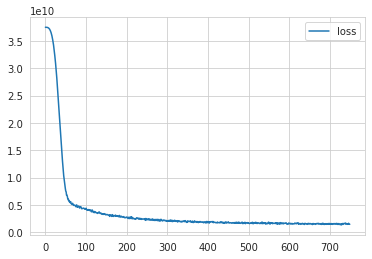

In [61]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# **Predictions**

In [62]:
predictions = model.predict(x_test)

In [63]:
Predictions = predictions.flatten()

In [64]:
Predictions = pd.Series(Predictions)

In [65]:
Predictions

0       104522.304688
1       158820.062500
2       172248.828125
3       194757.546875
4       185591.218750
            ...      
1454     67087.351562
1455     72234.601562
1456    163667.203125
1457    110860.875000
1458    186977.046875
Length: 1459, dtype: float32

In [66]:
Test_Id = pd.Series(test_id)

In [67]:
submission = pd.DataFrame({'Id': Test_Id, 'SalePrice': Predictions})

In [68]:
submission.tail(20)

,Id,SalePrice
1439,2900,149518.890625
1440,2901,207772.296875
1441,2902,196904.453125
1442,2903,314386.812500
1443,2904,337217.218750
1444,2905,59780.421875
1445,2906,200553.781250
1446,2907,104973.351562
1447,2908,112313.898438
1448,2909,142368.515625


In [69]:
submission = submission.fillna(value=submission['SalePrice'].mean())

**Save Submission File**

In [70]:
submission.to_csv('HPPredictSubmission.csv', index=False)